# Trial Notebook for XCast Pac Islands
Trial notebook to test out seasonal predictions using Xcast, modifying subseaonal scripts that Endalk wrote for Caribbean

## Libraries

In [96]:
import xcast as xc
import xarray as xr
import cartopy.crs as ccrs
import cartopy as cf
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

#functions, constants, created in same folder
import xcast_season_config as cfg
import helper_functions as helper
#automatically reloads the configuration file once updated and saved
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Constants

In [114]:
#large predictor zone
large_w=100
large_e=360
large_s=-25
large_n=0

#pacific island coordinates
pred_w=176
pred_e=185
pred_s=-20
pred_n=-15

In [138]:
chirps_hcst = xr.open_dataset(os.path.join(cfg.nmme_dir, 'nmme_hind_precip_ld1.nc'))
chirps_hcst

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360, time: 32)
Coordinates:
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float32 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0
  * time     (time) datetime64[ns] 2024-05-31 2025-05-31 ... 2055-05-31
Data variables:
    precip   (time, lat, lon) float64 ...

## Read / Prepare Seasonal Data

In [127]:
#read in data
nmme_mme_hcst = xr.open_dataset(os.path.join(cfg.nmme_dir, 'nmme_hind_precip_ld1.nc'))
nmme_mme_fcst = xr.open_dataset(os.path.join(cfg.nmme_dir, 'nmme_fcst_precip_ld1.nc'))
chirps_hcst = xr.open_dataset(os.path.join(cfg.chirps_dir, 'chirps_hind_precip_ld1.nc'))
chirps_pacisl = chirps_hcst.sortby('lon', ascending=True)
#modify all coordinates to 360' grid
chirps_360 = helper.adjust_longitude_to_360(chirps_hcst, 'lon').sortby('lat', ascending = False).sortby('lon', ascending = True)
nmme_hcst_360 = helper.adjust_longitude_to_360(nmme_mme_hcst, 'lon').sortby('lat', ascending = False).sortby('lon', ascending = True)
nmme_fcst_360 = helper.adjust_longitude_to_360(nmme_mme_fcst, 'lon').sortby('lat', ascending = False).sortby('lon', ascending = True)

#select over a large predictor zone relevant for pac islands
nmme_hcst_pacisl = nmme_hcst_360.sel(lon = slice(large_w, large_e),
                               lat = slice(large_n, large_s))
nmme_fcst_pacisl = nmme_fcst_360.sel(lon = slice(large_w, large_e),
                               lat = slice(large_n, large_s))
#chirps_pacisl = chirps_hcst.sortby('lon', ascending=True)#.sel(lon = slice(large_w, large_e),
                           #    lat = slice(large_n, large_s))

In [128]:
chirps_pacisl

<xarray.Dataset>
Dimensions:  (lat: 201, lon: 721, time: 32)
Coordinates:
  * lat      (lat) float32 -50.0 -49.5 -49.0 -48.5 -48.0 ... 48.5 49.0 49.5 50.0
  * lon      (lon) float32 -180.0 -179.5 -179.0 -178.5 ... 179.0 179.5 180.0
  * time     (time) datetime64[ns] 2024-05-31 2025-05-31 ... 2055-05-31
Data variables:
    precip   (time, lat, lon) float64 ...

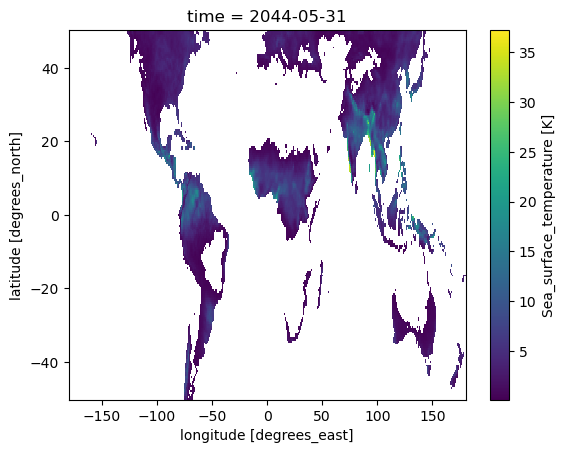

In [130]:
chirps_pacisl.precip.isel(time=20).plot()


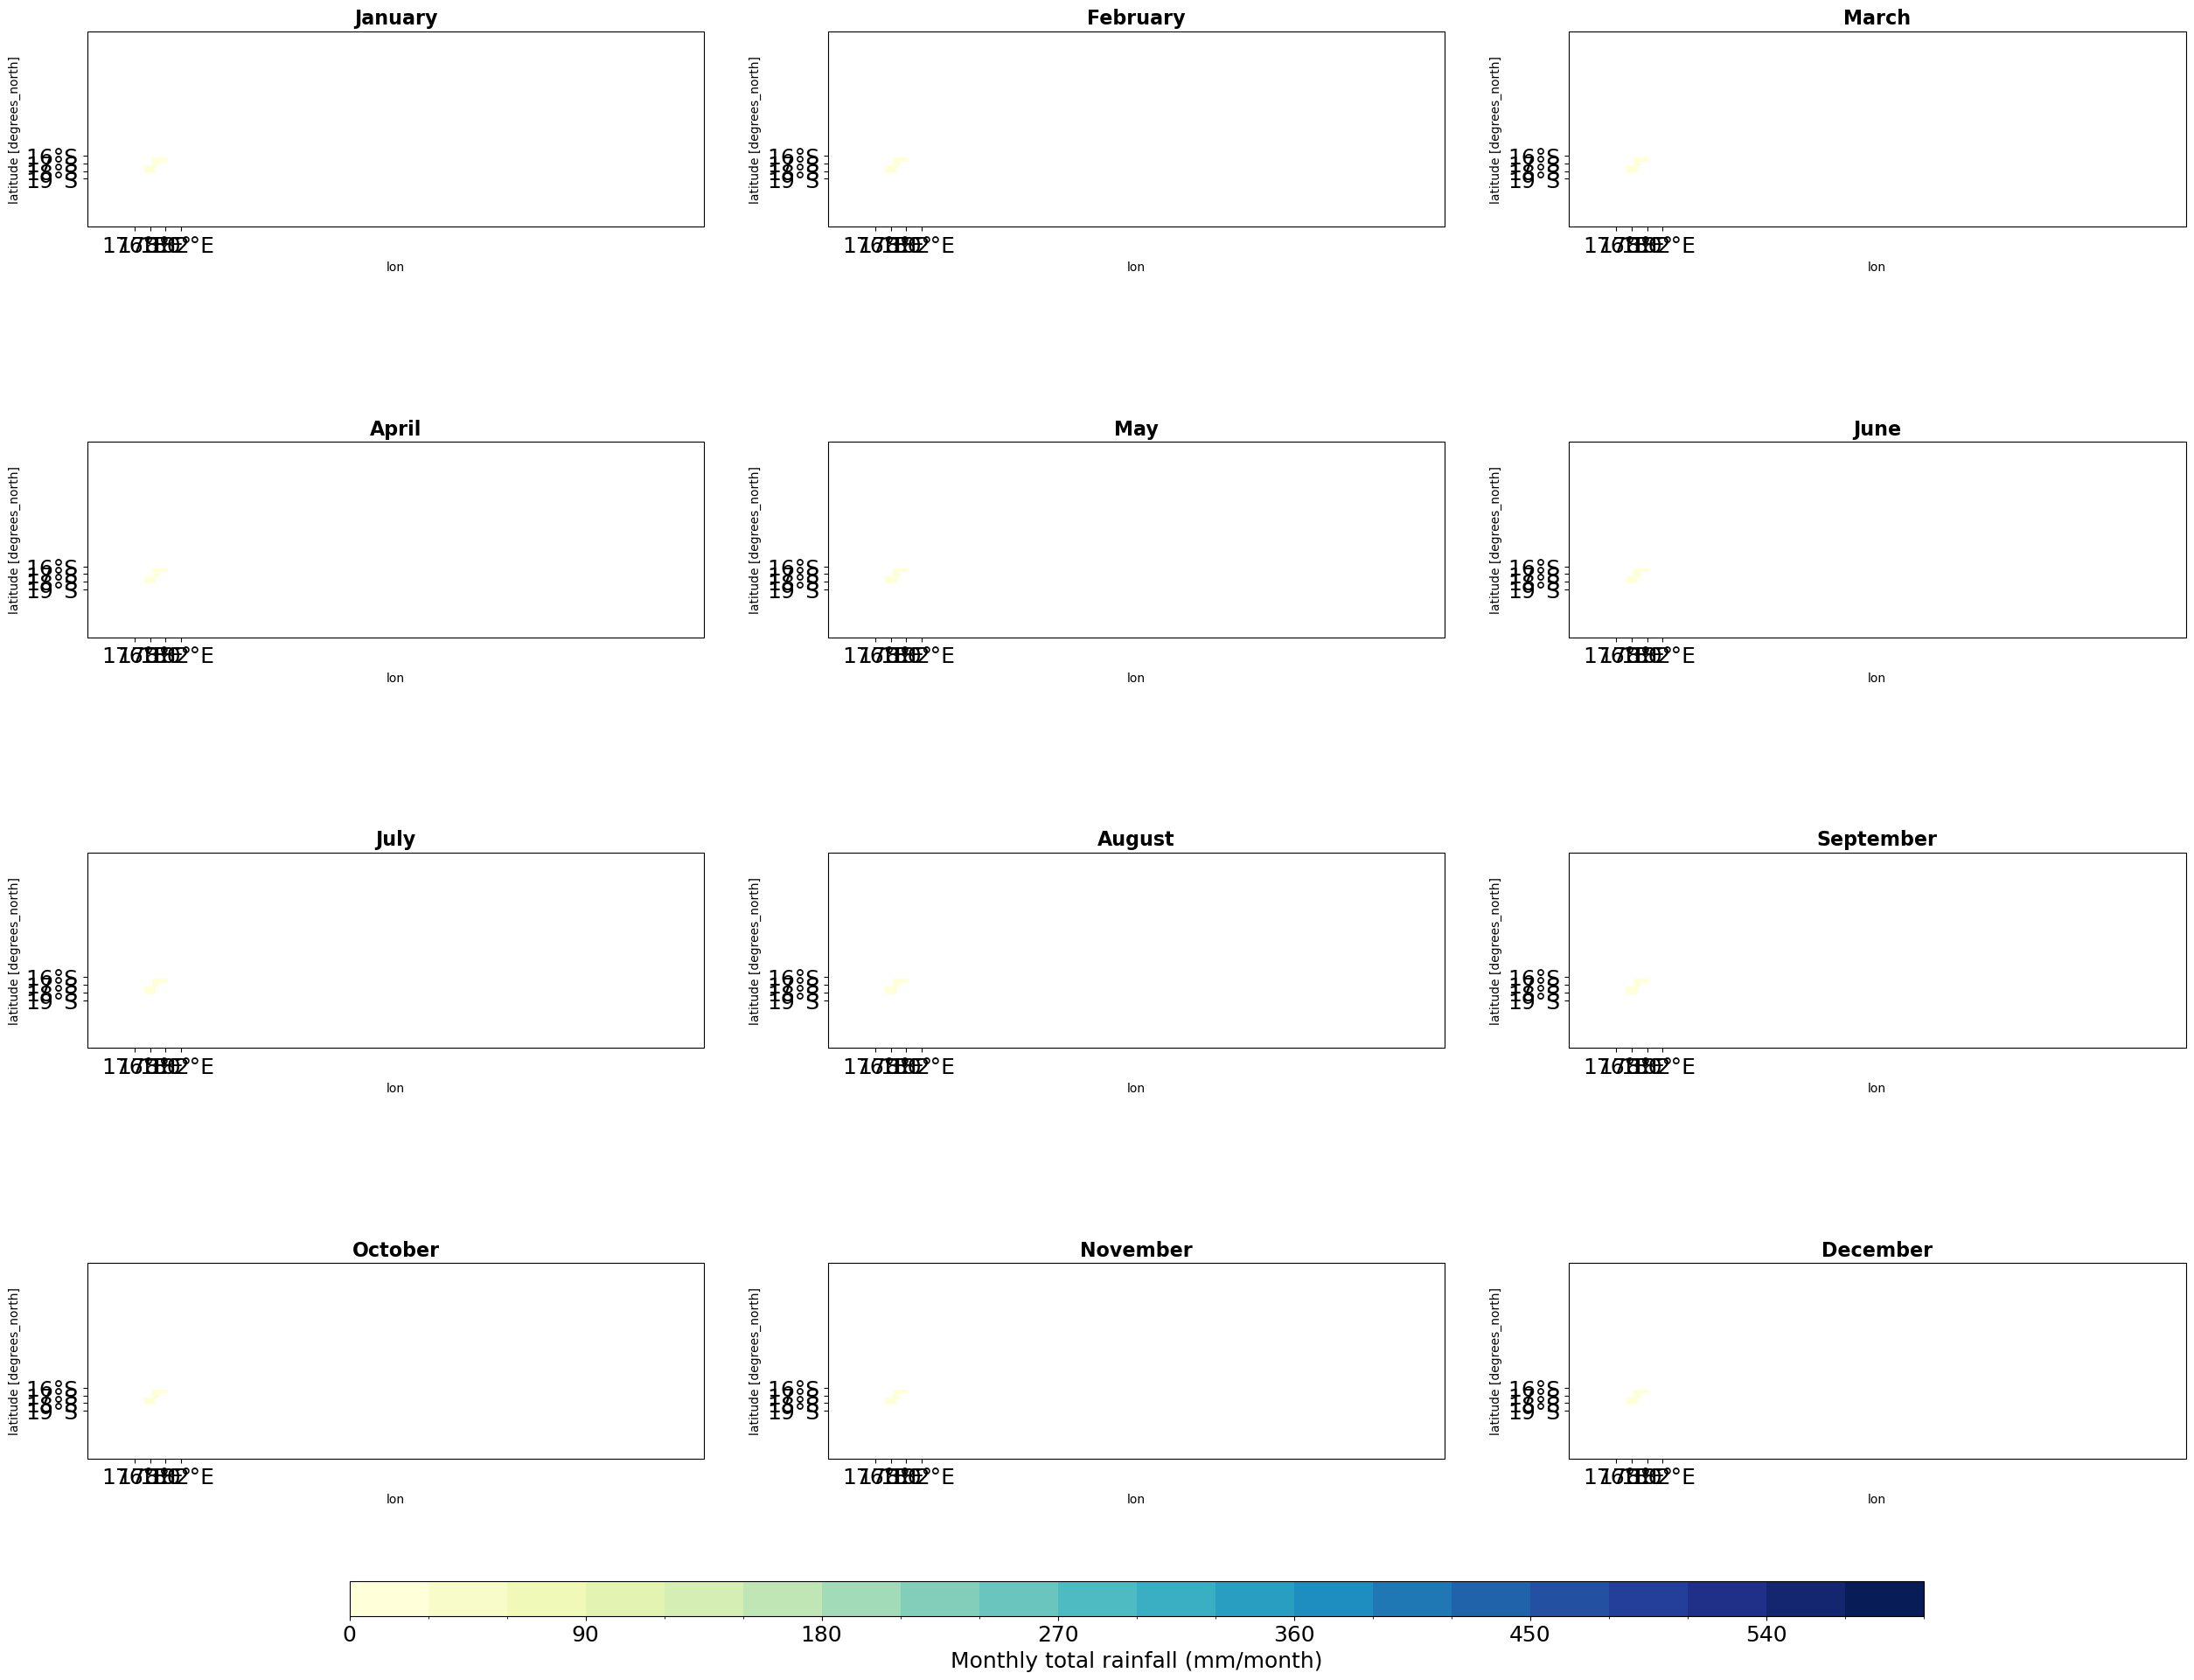

In [98]:
import calendar
# Create a figure
fig = plt.figure(figsize=(30, 20))

# Iterate over each month and plot the data
for i, month in enumerate(range(1, 13)):
    #print(month)
    # Add subplot to the figure
    ax = fig.add_subplot(4, 3, i+1, projection=ccrs.PlateCarree(central_longitude=180))
    P =chirps_pacisl.precip.isel(time=0)
    # Plot data for the current month
    im =P.plot(ax=ax,transform=ccrs.PlateCarree(), vmin=0, vmax=600, levels=21, cmap='YlGnBu',add_colorbar=False)
    del P
    # Set title with month name
    ax.set_title(calendar.month_name[month], fontsize=16, weight='bold')
    
    # Add features
   # ax.add_feature(cf.BORDERS)
   # ax.add_feature(cf.STATES)
    # Set the ticks manually
    xticks = [176, 178, 180, 182]
    yticks = [-19,  -18,  -17, -16]
    ax.set_xticks(xticks, crs=ccrs.PlateCarree())
    ax.set_yticks(yticks, crs=ccrs.PlateCarree())
    # Set the tick labels
    ax.set_xticklabels(['176°E', '178°E', '180°', '182°E'])
    ax.set_yticklabels(['19°S', '18°S', '17°S', '16°S'])
    # Set font size for tick labels
    plt.setp(ax.get_xticklabels(), fontsize=18)
    plt.setp(ax.get_yticklabels(), fontsize=18)
# Adjust layout
plt.subplots_adjust(left=0.05, right=0.85, top=0.95, bottom=0.05, wspace=0.2, hspace=0.2)
# Add a single horizontal colorbar below the panel plot
cbar_ax = fig.add_axes([0.15, 0.002, 0.6, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Monthly total rainfall (mm/month)', fontsize=18)
cbar.ax.tick_params(labelsize=18)

# Show plot
plt.show()

AttributeError: 'GeoQuadMesh' object has no attribute 'plot'

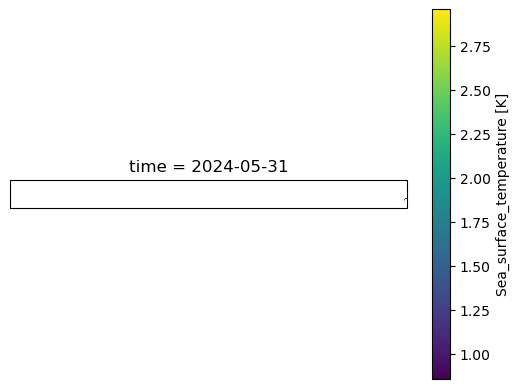

In [93]:
splot = chirps_pacisl.precip.isel(time=0).plot(subplot_kws={'projection':ccrs.PlateCarree(central_longitude = 180)})
splot = splot.plot(transform.ccrs.PleteCareer(), vmin=0, vmax = 600, levels=21)
plt.show()

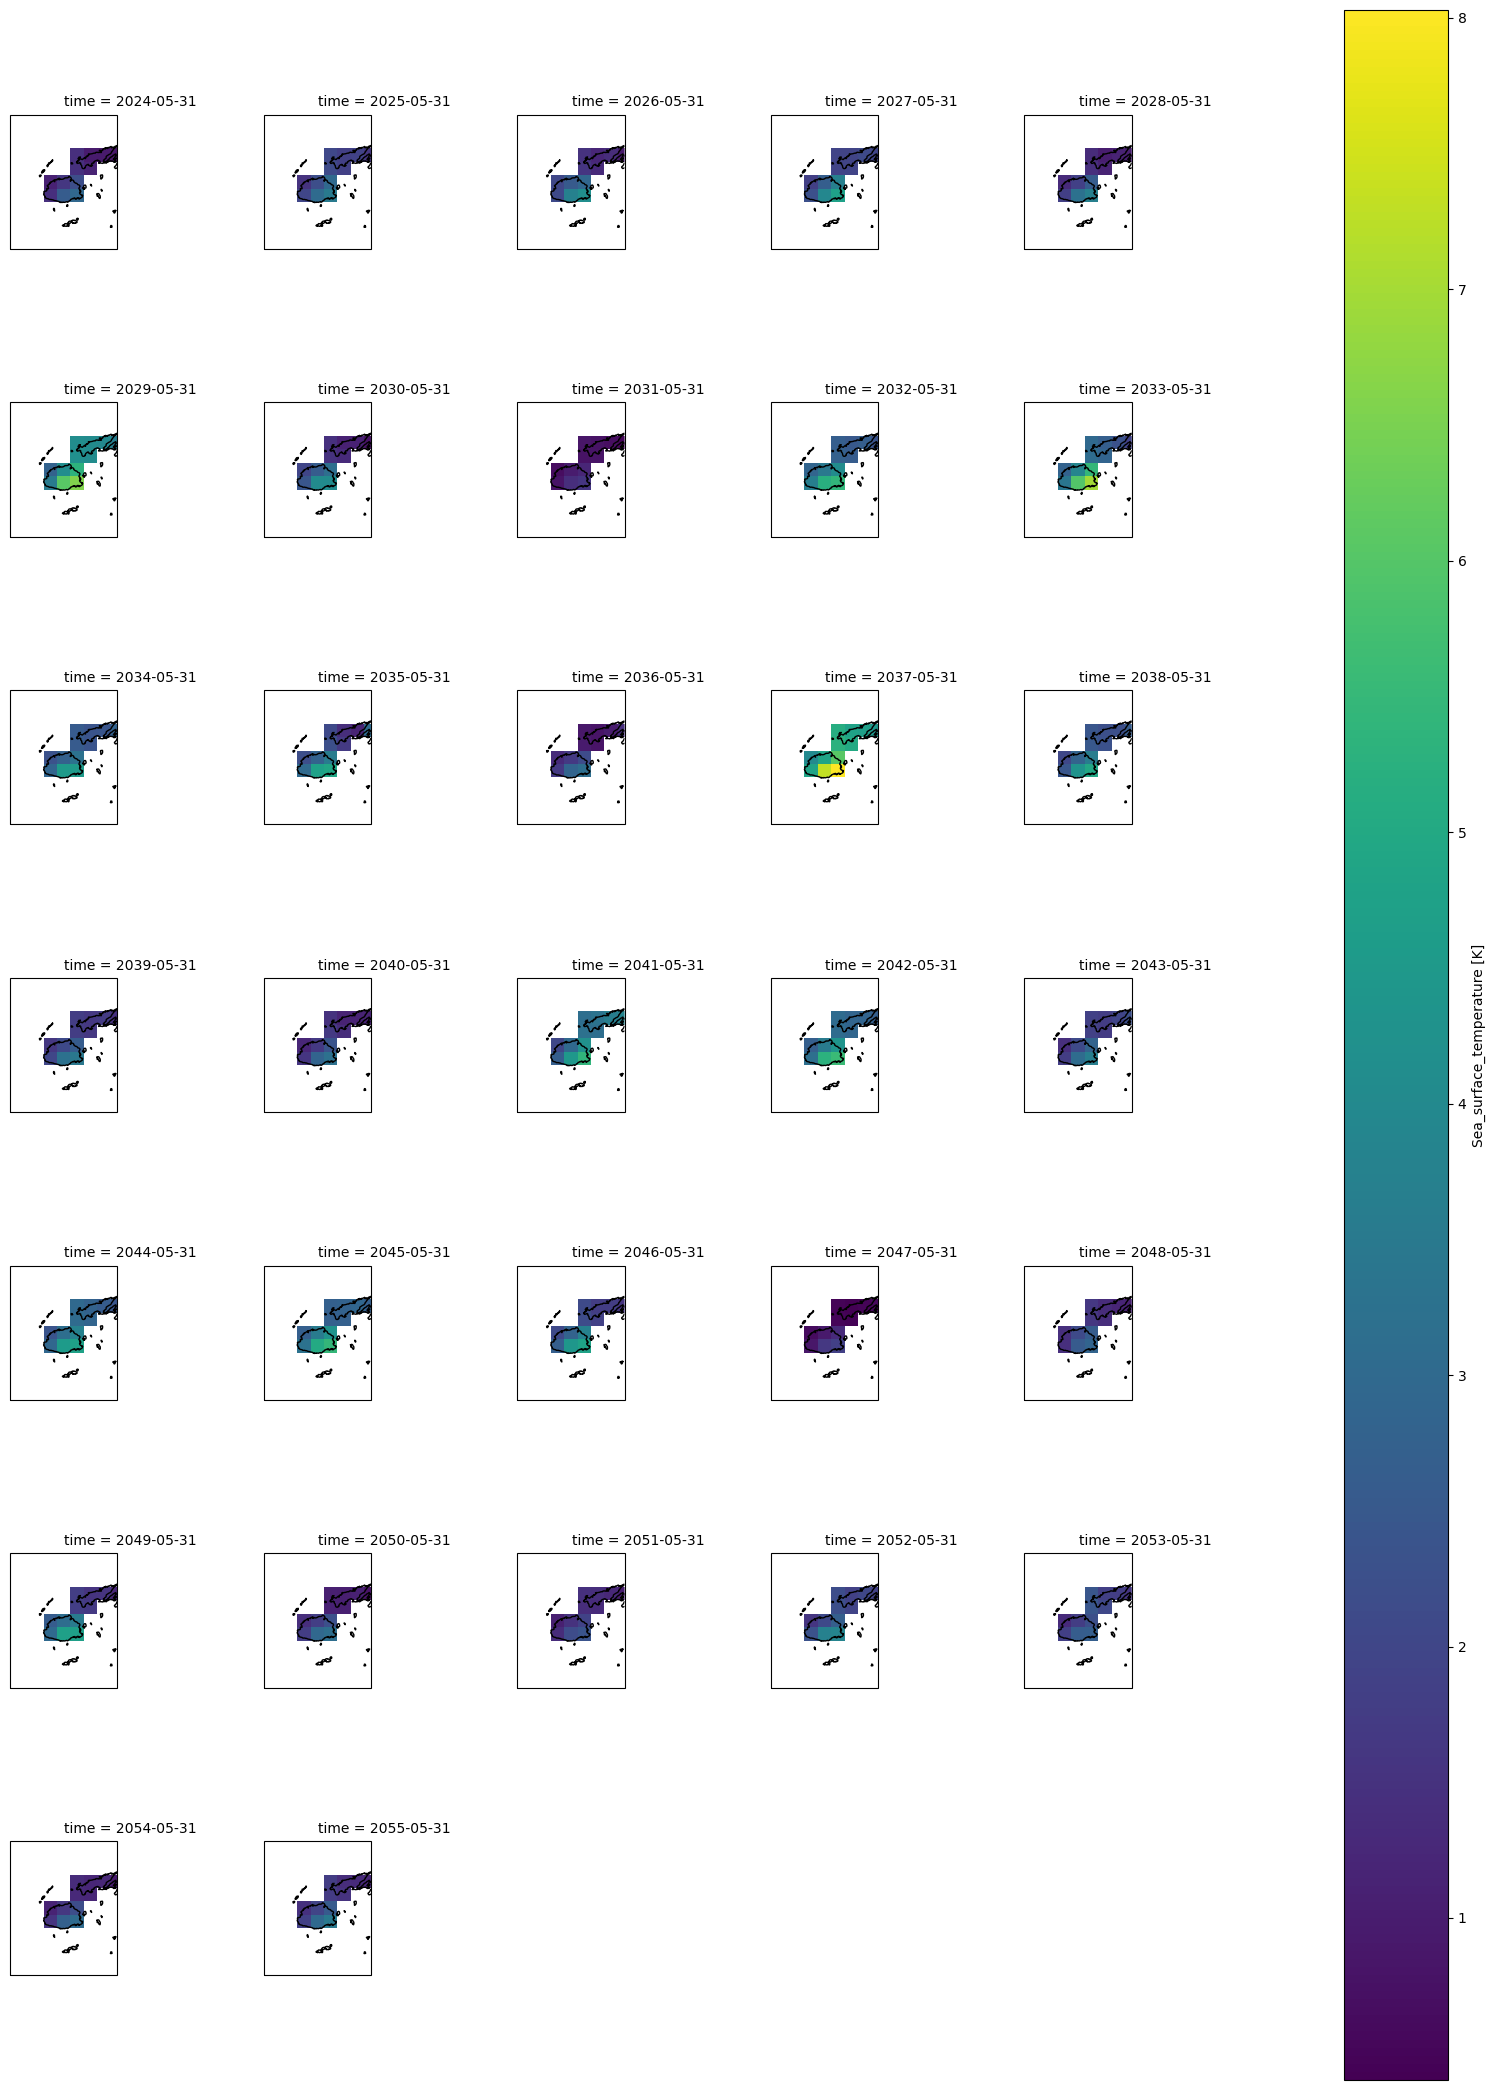

In [105]:
splot = chirps_pacisl.precip.plot(col = 'time', col_wrap = 5,subplot_kws={'projection':ccrs.PlateCarree()})
                                  # (transform.ccrs.PleteCareer(), vmin=0, vmax = 600, levels=21)
#splot = splot.plot(transform.ccrs.PleteCareer(), vmin=0, vmax = 600, levels=21)
for ax in  splot.axs.flat:
    coasts = ax.coastlines()
    ax.set_xlim(pred_w, pred_e)
    ax.set_ylim(pred_s, pred_n)
plt.show()

In [27]:
hmodelt = nmme_mme_hcst.precip.expand_dims({'M':[0]})
fmodelt = nmme_mme_fcst.precip.expand_dims({'M':[0]})
obs = chirps_hcst.precip.expand_dims({'M':[0]})

drymask = xc.drymask(obs, dry_threshold= cfg.dry_threshold)#, quantile_threshold=cfg.quantile_threshold)
obs = obs*drymask
drymask = xc.drymask(hmodelt, cfg.dry_threshold, cfg.quantile_threshold)
modelt = hmodelt*drymask

TypeError: _nanquantile_dispatcher() got an unexpected keyword argument 'method'